In Transfer Learning we are using pre-trained model to build our usecase. this pre-trained model is trained for one task and can be re trained for a similar task with a similar dataset.

It gives higher accuracy compared to training model from scratch.


Examples of pre-trained model-

1.VGG16

2.ResNet50

3.Inceptionv3

4.MobileNetv2

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:04<00:00, 136MB/s]
100% 715M/715M [00:04<00:00, 160MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls # linux command to print the file that we have downloaded

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 38.0 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r') # r for reading
archive.extractall()     #archive.extractall(path='/content/Training Data') used to extract on a particular location
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import the libraries

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train') # it will give all the files present in os directory

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['120.png', '17197.png', '28201.png', '19531.png', '23317.png']
['34937.png', '43418.png', '19000.png', '5600.png', '7514.png']


Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796] # just checking output based on id

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
# assinging numbers to labels manually as a key value format

labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


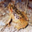

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

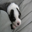

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/' # always include /

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png') # all the images in png format
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
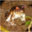

In [ ]:
data[0]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Scale the data(Normalization)

In [ ]:
# 0-->0
# 255-->1
# we will only scale data values not labels

X_train_scaled = X_train/255
X_test_scaled = X_test/255 # we can not do this in list that's why converted into numpy array

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Build Neural Network

In [ ]:
import tensorflow as tf # It has developed by google although pytorch is developed by meta(facebook)
from tensorflow import keras # keras is just a rapper of tensorflow & pytorch

In [ ]:
num_of_classes=10

# setting up layers of neural network (input layer,hidden layer,output layer)

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'), # 64 will be no. of neurons
    keras.layers.Dense(num_of_classes,activation='softmax') # output layer, softmax for binary data
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the neural network

model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10) # validation split just like test data

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2105 - loss: 2.0923 - val_accuracy: 0.2915 - val_loss: 1.9094
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2974 - loss: 1.9013 - val_accuracy: 0.3097 - val_loss: 1.8620
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3173 - loss: 1.8661 - val_accuracy: 0.3063 - val_loss: 1.8659
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3261 - loss: 1.8515 - val_accuracy: 0.3160 - val_loss: 1.8640
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3330 - loss: 1.8324 - val_accuracy: 0.3210 - val_loss: 1.8210
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3312 - loss: 1.8175 - val_accuracy: 0.3388 - val_loss: 1.8028
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3392 - loss: 1.8009 - val_accuracy: 0.3388 - val_loss: 1.8278
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3436 - loss: 1.7990 - 

Using ResNet50

In [ ]:
from tensorflow.keras import layers, Sequential, models
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
# call resnet model

convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3)) # include_top=false will import resnet by dropping their output layer
convolutional_base.summary() # below is the resnet architecture

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# adding some layers

num_of_classes=10

model=models.Sequential()
model.add(layers.UpSampling2D((2,2))) # (2,2) means height and weight will be multiplied 2 times
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), # lr is learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy=',accuracy)

In [ ]:
h=history

# plot the loss value

plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()


# plot the loss value

plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()